# Network Analysis (Freshio Gelato)
Skip to this part if you have `merged3.json`:
https://colab.research.google.com/drive/1nspP8l4Rsj5s2_HZV1akkZF6jdOYrcy8#scrollTo=XnNS8CnaRRTm


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np

## Pre-process
Open and remove empty fields

In [ ]:
df = pd.read_csv("Freshio_split2FollowersOfFollowers.csv")
df

,profileUrl,username,fullName,imgUrl,id,isPrivate,isVerified,query,timestamp,error
0,https://www.instagram.com/biahzinha._041,biahzinha._041,Bia♥️,https://scontent-fra3-2.cdninstagram.com/v/t51...,5.549967e+10,True,False,https://www.instagram.com/love_520_wee,2023-10-16T10:35:10.446Z,NaN
1,https://www.instagram.com/glassyskinofficial,glassyskinofficial,glass·y,https://scontent-fra3-2.cdninstagram.com/v/t51...,4.985997e+10,False,False,https://www.instagram.com/love_520_wee,2023-10-16T10:35:10.446Z,NaN
2,https://www.instagram.com/bluebee228,bluebee228,Bee Lan,https://scontent-fra5-1.cdninstagram.com/v/t51...,2.027382e+09,True,False,https://www.instagram.com/love_520_wee,2023-10-16T10:35:10.446Z,NaN
3,https://www.instagram.com/js_kong_38,js_kong_38,JS,https://scontent-fra3-1.cdninstagram.com/v/t51...,4.526065e+09,False,False,https://www.instagram.com/love_520_wee,2023-10-16T10:35:10.446Z,NaN
4,https://www.instagram.com/brian15xx,brian15xx,brian,https://scontent-fra5-1.cdninstagram.com/v/t51...,6.144254e+10,False,False,https://www.instagram.com/love_520_wee,2023-10-16T10:35:10.446Z,NaN
...,...,...,...,...,...,...,...,...,...,...
16816,https://www.instagram.com/wherethechickennugge...,wherethechickennuggetsat,WHERE THE AVOCADOS!,https://scontent-fra5-1.cdninstagram.com/v/t51...,5.816239e+09,True,False,https://www.instagram.com/kuekseng,2023-10-17T09:37:46.333Z,NaN
16817,https://www.instagram.com/dsu4x3p,dsu4x3p,ななせ♪,https://scontent-fra5-1.cdninstagram.com/v/t51...,9.954174e+09,True,False,https://www.instagram.com/kuekseng,2023-10-17T09:37:46.333Z,NaN
16818,https://www.instagram.com/wpe8darfwnoa,wpe8darfwnoa,NaN,https://scontent-fra3-2.cdninstagram.com/v/t51...,1.374026e+10,True,False,https://www.instagram.com/kuekseng,2023-10-17T09:37:46.333Z,NaN
16819,https://www.instagram.com/tjrfbgrsel,tjrfbgrsel,misuzu,https://scontent-fra5-2.cdninstagram.com/v/t51...,1.177277e+10,True,False,https://www.instagram.com/kuekseng,2023-10-17T09:37:46.334Z,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16821 entries, 0 to 16820
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   profileUrl  16723 non-null  object 
 1   username    16723 non-null  object 
 2   fullName    15555 non-null  object 
 3   imgUrl      16723 non-null  object 
 4   id          16723 non-null  float64
 5   isPrivate   16723 non-null  object 
 6   isVerified  16723 non-null  object 
 7   query       16821 non-null  object 
 8   timestamp   16821 non-null  object 
 9   error       98 non-null     object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [ ]:
df.dropna(subset=['profileUrl'], inplace=True)

## Create Graph
This runs the iterations to create the graph which we will use for the analysis.

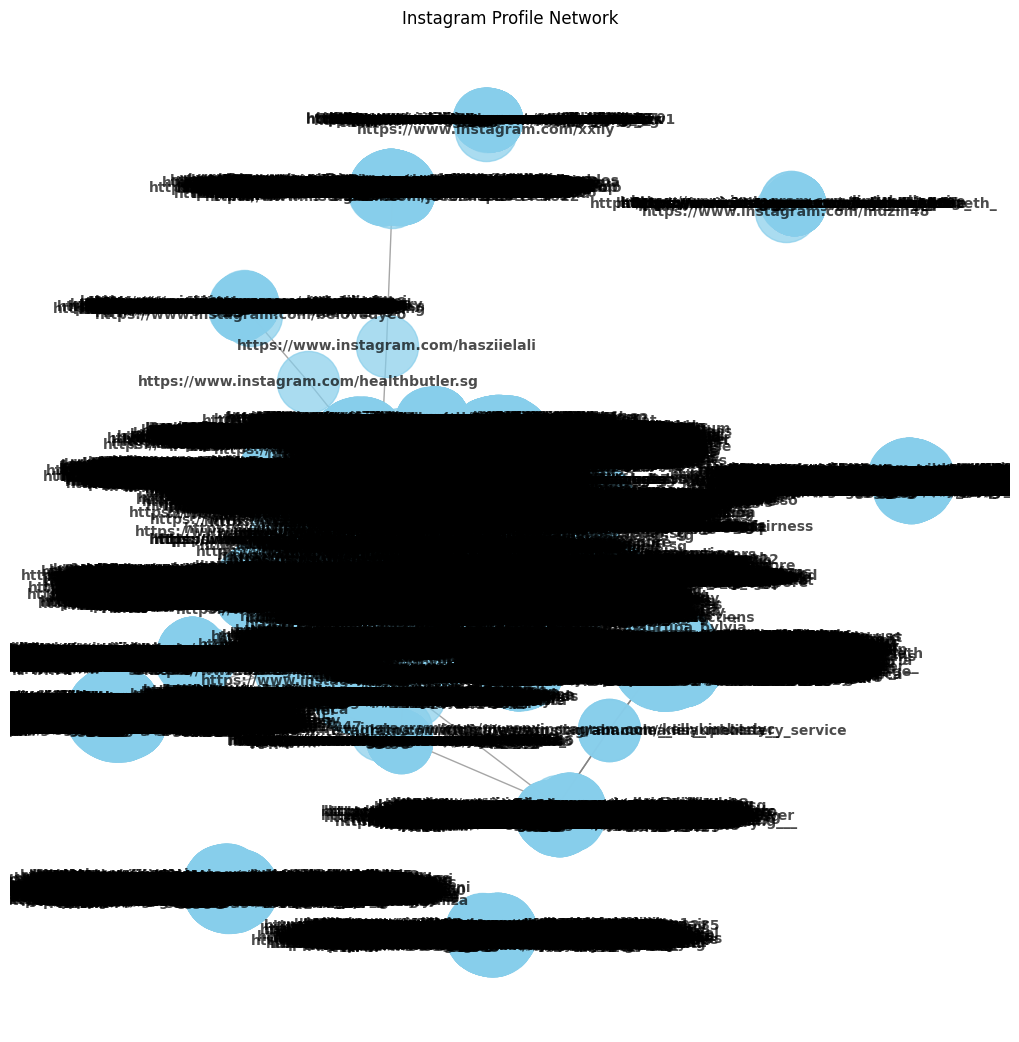

In [ ]:
# Create a new graph for visualization
G_visualization = nx.Graph()

# Add nodes and edges to the visualization graph
for _, row in df.iterrows():
    G_visualization.add_node(row['profileUrl'])
    if pd.notna(row['query']):
        G_visualization.add_node(row['query'])
        G_visualization.add_edge(row['profileUrl'], row['query'])

# Visualize the graph
pos = nx.spring_layout(G_visualization)
plt.figure(figsize=(10, 10))
nx.draw(G_visualization, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight="bold", edge_color="gray", width=1, alpha=0.7)
plt.title("Instagram Profile Network")
plt.show()



### Save the data in a json file

In [ ]:
import json

# Convert the graph to a dictionary
graph_data = {
    'nodes': [{'id': node} for node in G_visualization.nodes()],
    'edges': [{'source': u, 'target': v} for u, v in G_visualization.edges()]
}

# Specify the file path to save the JSON data
json_file_path = 'graph_data5.json'  # Replace with your desired path and filename

# Save the graph data as a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(graph_data, json_file, indent=4)

print('Graph data saved as JSON:', json_file_path)

Graph data saved as JSON: graph_data5.json


## [Optional] Merge the 2 segment together

In [ ]:
import json

json_file_path2 = 'merged2.json'
json_file_path3 = 'graph_data5.json'

# Load the existing JSON data from the first file
with open(json_file_path2, 'r') as json_file:
    existing_data2 = json.load(json_file)

# Load the existing JSON data from the second file
with open(json_file_path3, 'r') as json_file:
    existing_data3 = json.load(json_file)

# Ensure the loaded data is not None
if existing_data2 is None:
    existing_data2 = {'nodes': [], 'edges': []}

if existing_data3 is None:
    existing_data3 = {'nodes': [], 'edges': []}


In [ ]:
# Merge nodes and edges
merged_nodes = existing_data2['nodes'] + existing_data3['nodes']
merged_edges = existing_data2['edges'] + existing_data3['edges']

# Remove duplicates from merged nodes and edges
merged_nodes = list({node['id']: node for node in merged_nodes}.values())
merged_edges = list({(edge['source'], edge['target']): edge for edge in merged_edges}.values())

# Create the merged graph data
merged_graph_data = {
    'nodes': merged_nodes,
    'edges': merged_edges
}


In [ ]:
# Specify the file path to save the merged JSON data
merged_json_file_path = 'merged3.json'

# Save the merged graph data as a JSON file
with open(merged_json_file_path, 'w') as json_file:
    json.dump(merged_graph_data, json_file, indent=4)

print('Merged graph data saved as JSON:', merged_json_file_path)


Merged graph data saved as JSON: merged3.json


### Graph

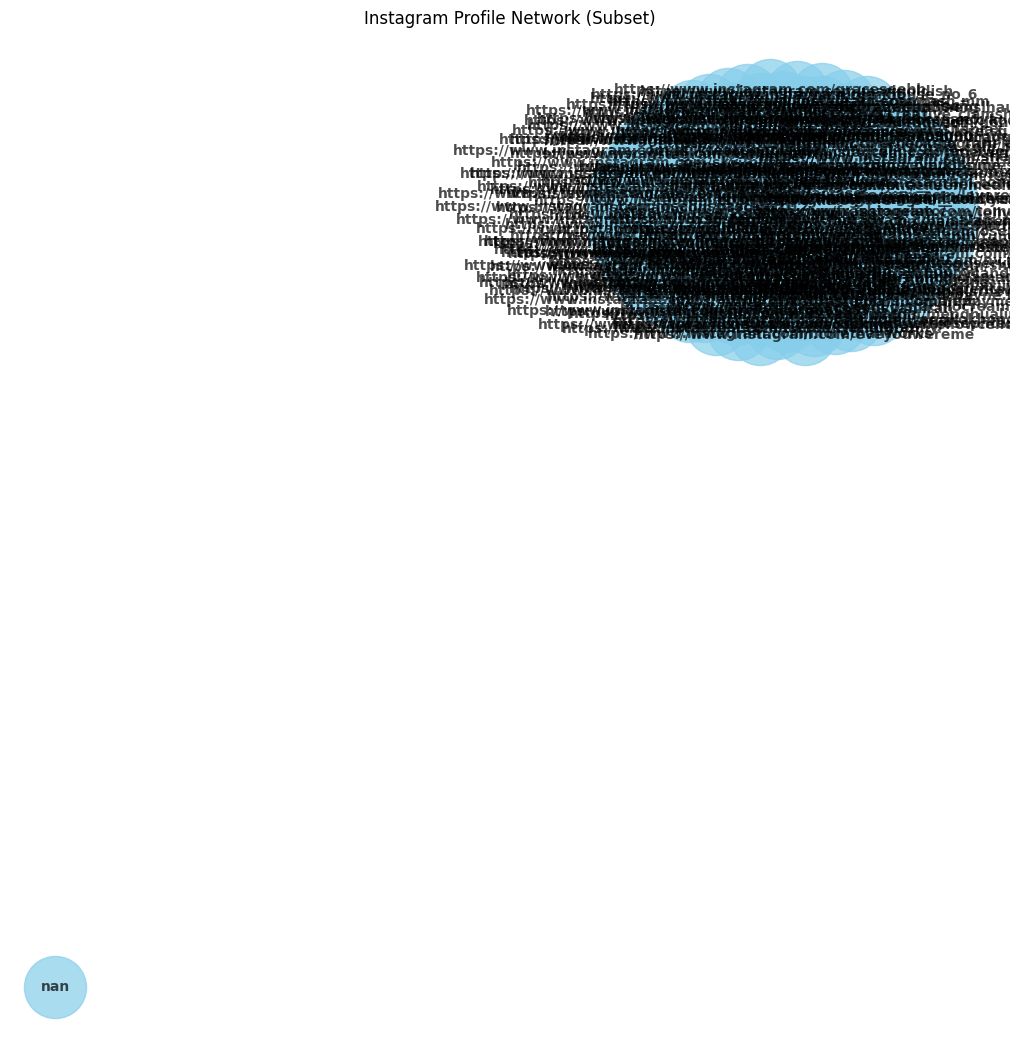

In [ ]:
import json

# Load the graph data from the saved JSON file
with open('merged3.json', 'r') as json_file:
    graph_data = json.load(json_file)

# Create a new graph
G_loaded = nx.Graph()

# Add nodes from the loaded data
for node in graph_data['nodes']:
    G_loaded.add_node(node['id'])

# Add edges from the loaded data
for edge in graph_data['edges']:
    G_loaded.add_edge(edge['source'], edge['target'])

# Subsampling or filtering nodes and edges based on certain criteria
# For example, keeping only nodes with a degree higher than a threshold
threshold_degree = 10  # Adjust as needed
filtered_nodes = [node for node in G_loaded.nodes() if G_loaded.degree(node) > threshold_degree]
filtered_edges = [(u, v) for u, v in G_loaded.edges() if u in filtered_nodes and v in filtered_nodes]

# Create a subgraph with the filtered nodes and edges
subgraph = G_loaded.subgraph(filtered_nodes)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))
nx.draw(subgraph, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, font_weight="bold", edge_color="gray", width=1, alpha=0.7)
plt.title("Instagram Profile Network (Subset)")
plt.show()


In [ ]:
### This is the older one

import numpy as np

# Compute centrality measures for each node
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Combine centrality measures into a single score (you can experiment with different combinations)
combined_centrality = {
    node: degree_centrality[node] + betweenness_centrality[node] + eigenvector_centrality[node]
    for node in G.nodes()
}

# Get the most influential nodes based on the combined centrality score
most_influential_nodes = sorted(combined_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the node names for visualization
most_influential_node_names = [node[0] for node in most_influential_nodes]

# Create a subgraph with the most influential nodes and their neighbors
subgraph = G.subgraph(most_influential_node_names)

# Visualize the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=[combined_centrality[node] * 5000 for node in subgraph.nodes()],
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=1,
    alpha=0.7,
)
plt.title("Most Influential Followers in Instagram Profile Network")
plt.show()


## PageRank
We will be using pagerank to find the highest centralities among the followers
Notes:
- The size of the node determines how big of an influence the node is.
- The number of nodes to be shown can be adjusted here:<br>
`most_influential_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:50]` <br>
by changing the final value `[:50]` to a value you desire

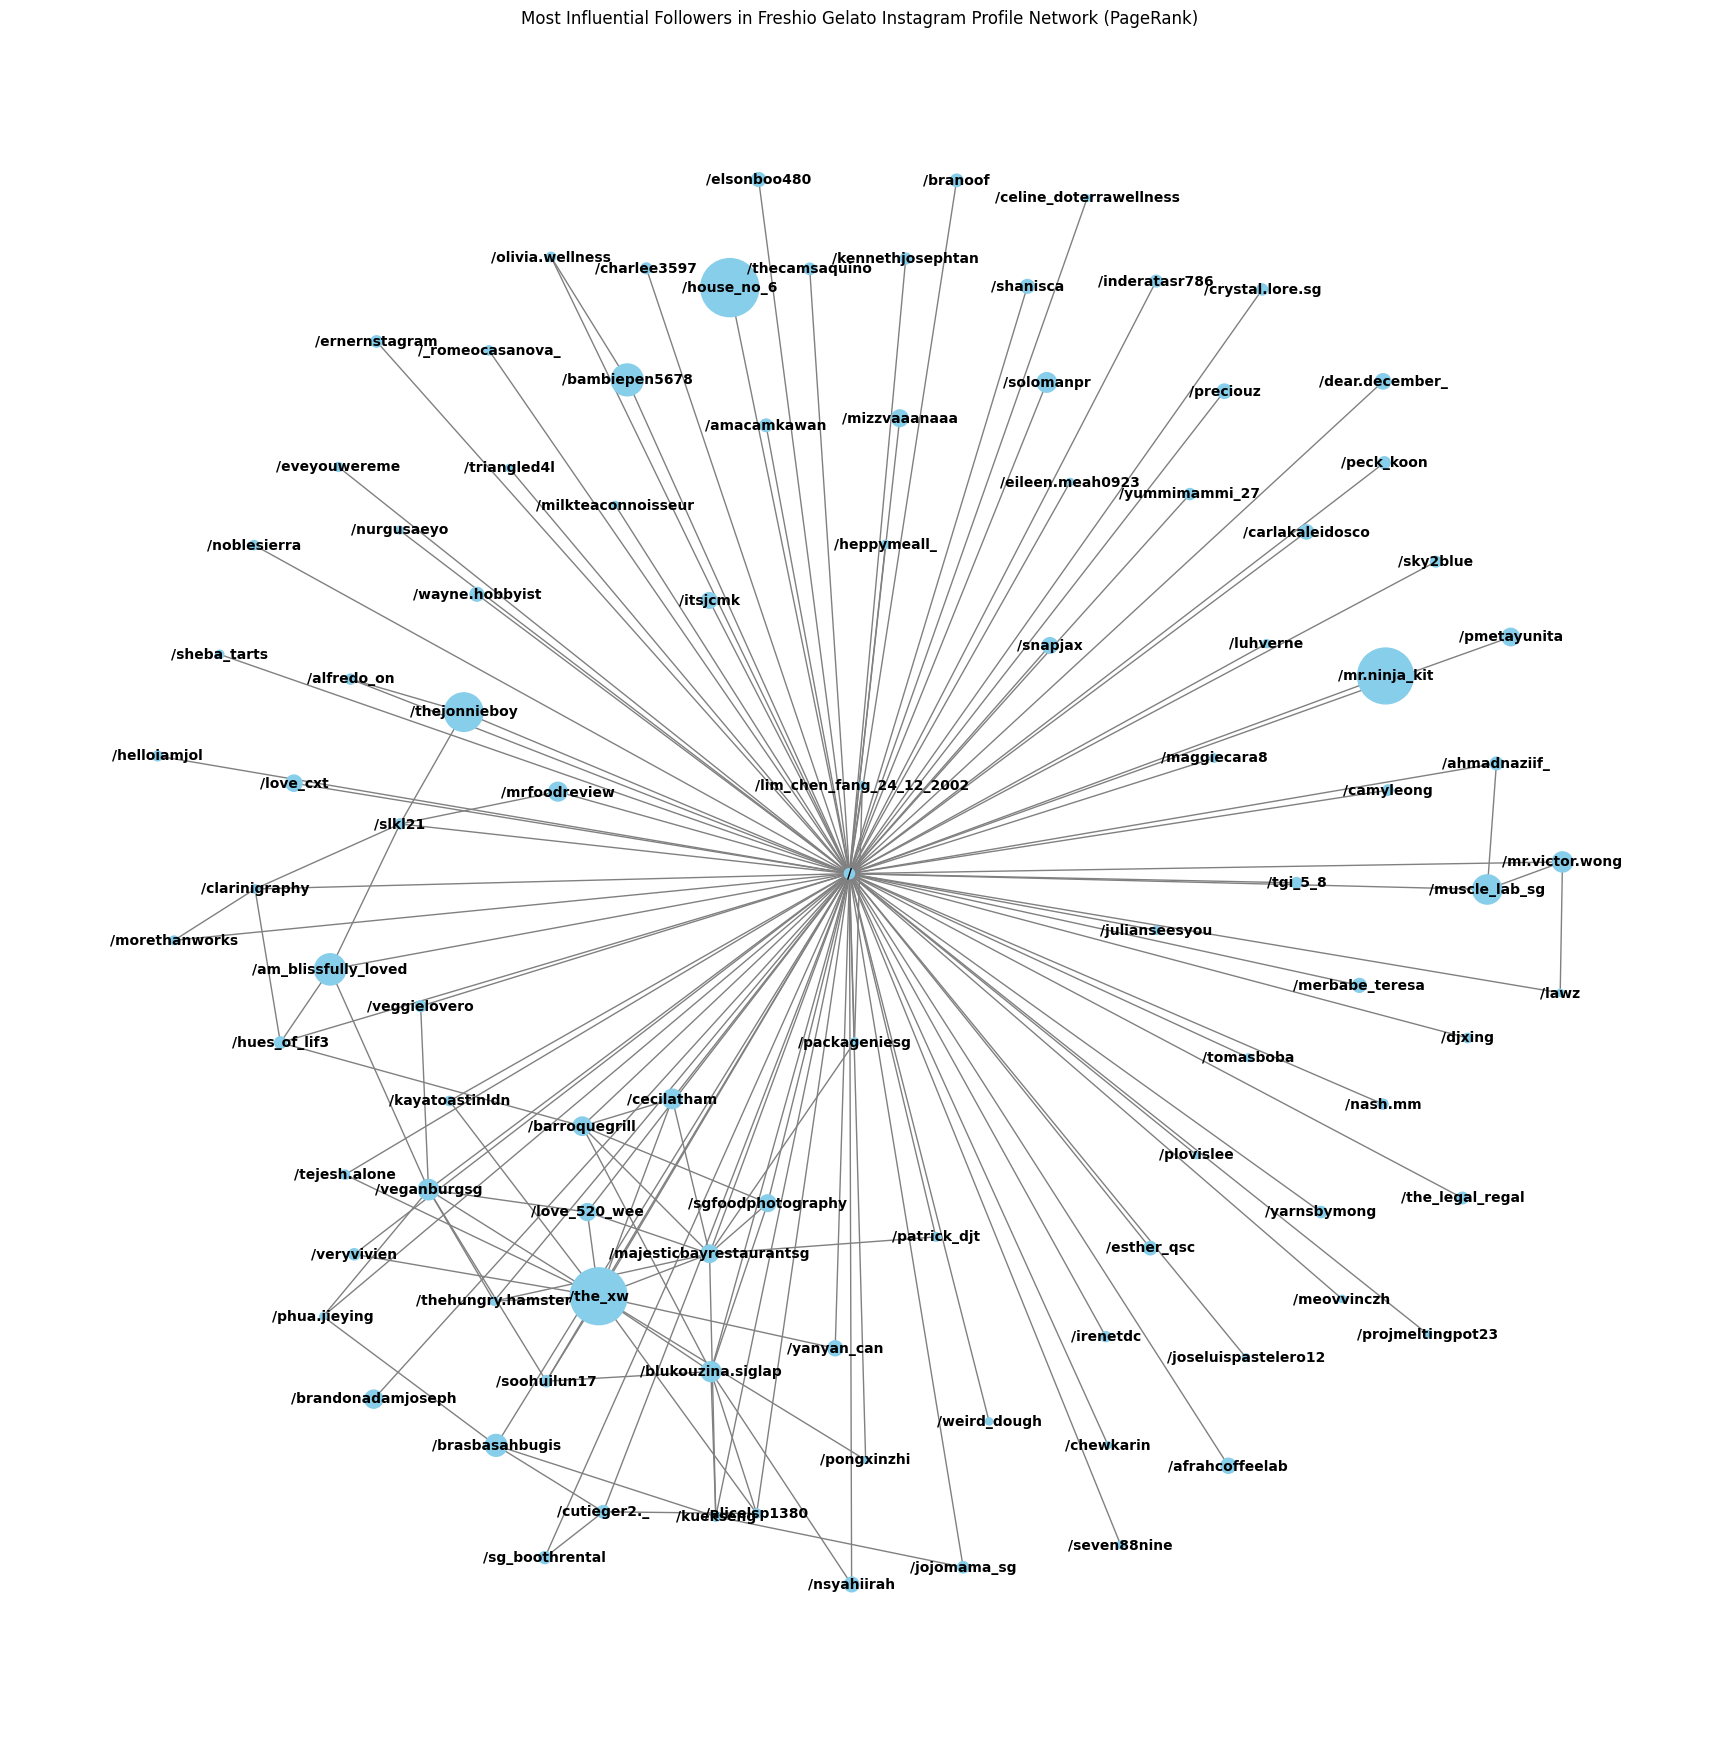

In [2]:
import json

# Load the graph data from the saved JSON file
with open('merged3.json', 'r') as json_file:
    graph_data = json.load(json_file)

# Create a new graph
G_loaded = nx.Graph()

# Add nodes from the loaded data
for node in graph_data['nodes']:
    G_loaded.add_node(node['id'])

# Add edges from the loaded data
for edge in graph_data['edges']:
    G_loaded.add_edge(edge['source'], edge['target'])

# Compute PageRank centrality for each node
pagerank_centrality = nx.pagerank(G_loaded)

# Get the most influential nodes based on PageRank scores
most_influential_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:100]

# Extract the node names for visualization
most_influential_node_names = [node[0] for node in most_influential_nodes]

# Create a subgraph with the most influential nodes and their neighbors
subgraph = G_loaded.subgraph(most_influential_node_names)

# Shorten the labels
shortened_labels = {node: '/' + node.split('/')[-1] for node in subgraph.nodes()}

# Visualize the subgraph
pos = nx.spring_layout(subgraph, k=0.025)
plt.figure(figsize=(17, 17))
nx.draw(
    subgraph,
    pos,
    labels=shortened_labels,  # Use shortened labels here
    node_color="skyblue",
    node_size=[pagerank_centrality[node] * 35000 for node in subgraph.nodes()],
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=1,
    alpha=1,
)
plt.title("Most Influential Followers in Freshio Gelato Instagram Profile Network (PageRank)")
plt.show()


### Degree

In [5]:
# Compute degrees for the top 100 nodes
degrees = G_loaded.degree(most_influential_node_names)

# Convert data to a DataFrame
df = pd.DataFrame({
    'Node': [shortened_labels[node] for node in most_influential_node_names],
    'Degree': [degrees[node] for node in most_influential_node_names]
})

# Sort DataFrame by Degree in descending order
df = df.sort_values(by='Degree', ascending=False)

df


,Node,Degree
1,/the_xw,19993
0,/house_no_6,19565
2,/mr.ninja_kit,17907
3,/thejonnieboy,9000
5,/am_blissfully_loved,6443
...,...,...
97,/phua.jieying,300
92,/eileen.meah0923,296
96,/pongxinzhi,292
98,/chewkarin,283


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Degree'].plot(kind='hist', bins=20, title='Degree')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Degree', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Degree'].plot(kind='line', figsize=(8, 4), title='Degree')
plt.gca().spines[['top', 'right']].set_visible(False)

### Centrality Score

## Accounts
These are the accounts that have the highest pagerank centrality.<br>
To-do: can explore these accounts and see what they are, how to generalise them


In [ ]:
for node in subgraph.nodes():
    print("Node:", node)

Node: https://www.instagram.com/amacamkawan
Node: https://www.instagram.com/yanyan_can
Node: https://www.instagram.com/preciouz
Node: https://www.instagram.com/esther_qsc
Node: https://www.instagram.com/afrahcoffeelab
Node: https://www.instagram.com/snapjax
Node: https://www.instagram.com/branoof
Node: https://www.instagram.com/merbabe_teresa
Node: https://www.instagram.com/dear.december_
Node: https://www.instagram.com/sg_boothrental
Node: https://www.instagram.com/shanisca
Node: https://www.instagram.com/cutieger2._
Node: https://www.instagram.com/wayne.hobbyist
Node: https://www.instagram.com/ahmadnaziif_
Node: https://www.instagram.com/love_cxt
Node: https://www.instagram.com/elsonboo480
Node: https://www.instagram.com/nsyahiirah
Node: https://www.instagram.com/itsjcmk
Node: https://www.instagram.com/carlakaleidosco
Node: https://www.instagram.com/sgfoodphotography


In [ ]:
# Output below shows the nodes sorted with the pagerank score sorted
sorted_nodes = sorted(most_influential_nodes, key=lambda x: x[1], reverse=True)

for node in sorted_nodes:
    print(f"Node: {node[0]}, PageRank Score: {node[1]}")

for node in sorted_nodes:
    print(node[0])

Node: https://www.instagram.com/house_no_6, PageRank Score: 0.04985741935113115
Node: https://www.instagram.com/the_xw, PageRank Score: 0.04780954464124061
Node: https://www.instagram.com/mr.ninja_kit, PageRank Score: 0.04607370155989632
Node: https://www.instagram.com/thejonnieboy, PageRank Score: 0.021926401023031564
Node: https://www.instagram.com/bambiepen5678, PageRank Score: 0.015038015370133878
Node: https://www.instagram.com/am_blissfully_loved, PageRank Score: 0.014425593881310608
Node: https://www.instagram.com/muscle_lab_sg, PageRank Score: 0.01264954547975594
Node: https://www.instagram.com/brasbasahbugis, PageRank Score: 0.007045972479658685
Node: https://www.instagram.com/veganburgsg, PageRank Score: 0.0061146611223866585
Node: https://www.instagram.com/mr.victor.wong, PageRank Score: 0.005997039512407447
Node: https://www.instagram.com/blukouzina.siglap, PageRank Score: 0.0059221118872216415
Node: https://www.instagram.com/solomanpr, PageRank Score: 0.005632122507624535


## Cluster

In [ ]:
!pip install python-louvain networkx

In [ ]:
import numpy as np
import random

from IPython.display import Image
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import networkx as nx
from networkx.algorithms import community

%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile

In [ ]:
import json
import networkx as nx
from networkx.algorithms import community
from community import best_partition

# 1. Read and parse the adjacency JSON from the file.
with open('merged3.json', 'r') as file:
    parsed_data = json.load(file)

# 2. Convert the parsed data to a graph.
G = nx.Graph()
for node in parsed_data["nodes"]:
    G.add_node(node["id"])
for edge in parsed_data["edges"]:
    G.add_edge(edge["source"], edge["target"])

# 3. Use the Louvain community detection method to cluster the nodes into communities.
partition = best_partition(G)

# 4. Organize the nodes by their community
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

print(communities)


ImportError: ignored

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Load the graph data from the saved JSON file
with open('merged3.json', 'r') as json_file:
    graph_data = json.load(json_file)

# Create a new graph
G_loaded = nx.Graph()

# Add nodes and edges from the loaded data
for node in graph_data['nodes']:
    G_loaded.add_node(node['id'])

for edge in graph_data['edges']:
    G_loaded.add_edge(edge['source'], edge['target'])

# Compute PageRank centrality for each node
pagerank_centrality = nx.pagerank(G_loaded)

# Get the most influential nodes based on PageRank scores
most_influential_nodes = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:100]
most_influential_node_names = [node[0] for node in most_influential_nodes]

# Create a subgraph with the most influential nodes and their neighbors
subgraph = G_loaded.subgraph(most_influential_node_names)

# Community detection using Louvain's method
partition = community_louvain.best_partition(subgraph)
community_colors = [partition[node] for node in subgraph.nodes()]

# Shorten the labels
shortened_labels = {node: '/' + node.split('/')[-1] for node in subgraph.nodes()}

# Visualize the subgraph with communities
pos = nx.spring_layout(subgraph, k=0.025)
plt.figure(figsize=(17, 17))
nx.draw(
    subgraph,
    pos,
    labels=shortened_labels,
    cmap=plt.get_cmap('jet'),
    node_color=community_colors,  # Use colors based on communities
    node_size=[pagerank_centrality[node] * 35000 for node in subgraph.nodes()],
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=1,
    alpha=1,
)
plt.title("Communities of Most Influential Followers in Freshio Gelato Instagram Profile Network", fontsize=16, fontweight='bold')
plt.show()


AttributeError: ignored